<a href="https://colab.research.google.com/github/Emilianaalia/capstone-project-hacktiv8/blob/main/capstone-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Student Mental Health Analysis

This project analyzes the mental health status of students using a publicly available dataset. It explores the relationship between stress, anxiety, depression, and lifestyle factors such as sleep, physical activity, diet, and academic performance.

### Objectives:
- Understand the distribution of mental health scores among students
- Discover possible correlations between mental health and lifestyle or academic factors
- Generate insights and recommendations using AI assistance (IBM Granite)

### Dataset:
- **Source:** [Student Mental Health Assessment Dataset](https://github.com/NidhiU-24/Student-Mental-Health-Assessment)
- **Entries:** 7000+ students
- **Features:** Age, Gender, CGPA, Stress Level, Sleep Quality, etc.

This project is part of the Hacktiv8 x IBM SkillsBuild capstone assignment.


### Import Libraries

- **Pandas** for data handling  
- **Matplotlib** & **Seaborn** for data visualization  
- **OS** for environment setup  
- **Replicate (IBM Granite)** for generating AI-driven insights and recommendations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load Dataset

We load a public student mental health dataset using `pandas` to explore features like age, gender, CGPA, stress level, sleep quality, and lifestyle factors.


In [2]:

url = "https://raw.githubusercontent.com/NidhiU-24/Student-Mental-Health-Assessment/main/students_mental_health_survey.csv"
data = pd.read_csv(url)
data.head()


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


### Data Cleaning Steps

- Filled missing **CGPA** values with the mean.
- Replaced missing **Substance_Use** entries with `'Unknown'`.
- Dropped any remaining rows with missing data.


In [5]:
data = data.dropna()
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)
data['Substance_Use'].fillna('Unknown', inplace=True);
data.dropna(inplace=True)
print(data.isnull().sum())  # semua kolom harus 0

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64


/tmp/ipython-input-5-3342136895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)
/tmp/ipython-input-5-3342136895.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Data Visualization

This section explores and visualizes the dataset using Seaborn and Matplotlib. We analyze the distribution of variables and examine potential relationships to uncover meaningful patterns.


### Student Demographics
This section explores the basic characteristics of the students in the dataset, such as age, gender, and academic course.

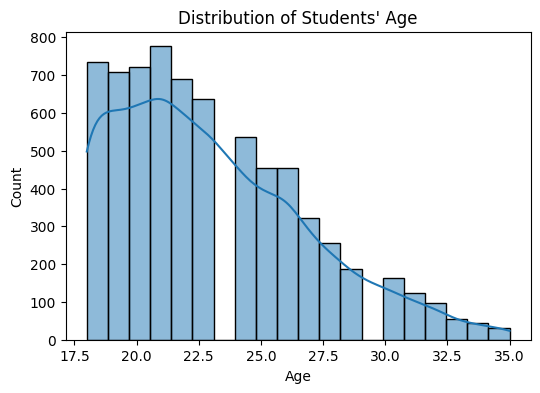

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Students\' Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

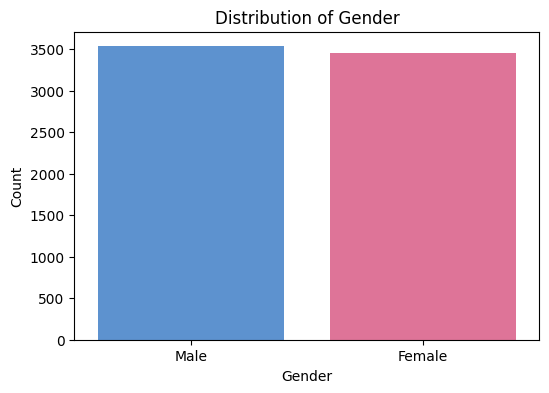

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Gender', palette={'Male': '#4A90E2', 'Female': '#F06292'}, legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

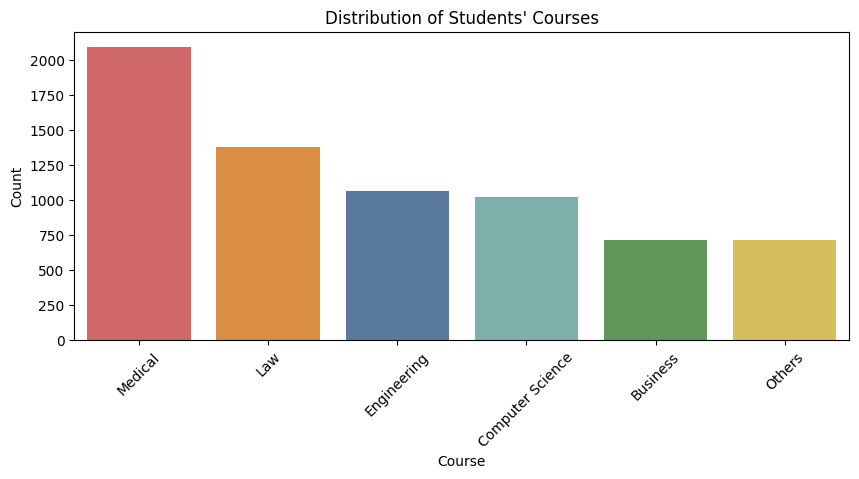

In [ ]:
courses = data['Course'].value_counts().index.tolist()

custom_colors = ['#E15759', '#F28E2B','#4E79A7' , '#76B7B2', '#59A14F', '#EDC948', '#B07AA1' , '#FF9DA7']
palette = dict(zip(courses, custom_colors))

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Course', order=courses, hue='Course', palette=palette, legend=False)
plt.title("Distribution of Students' Courses")
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

### General Mental Health Condition
We analyze the overall mental health status of students by observing stress levels, depression, and anxiety scores.


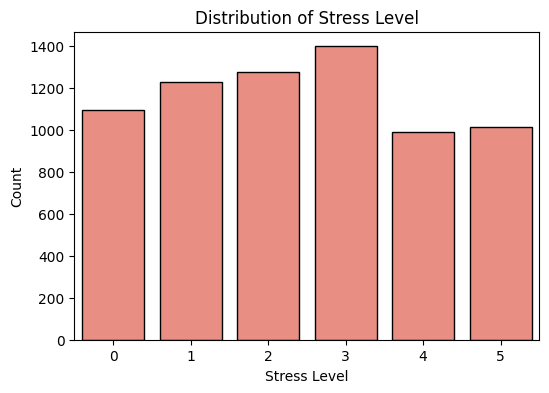

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Stress_Level', color='salmon', edgecolor='black')
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

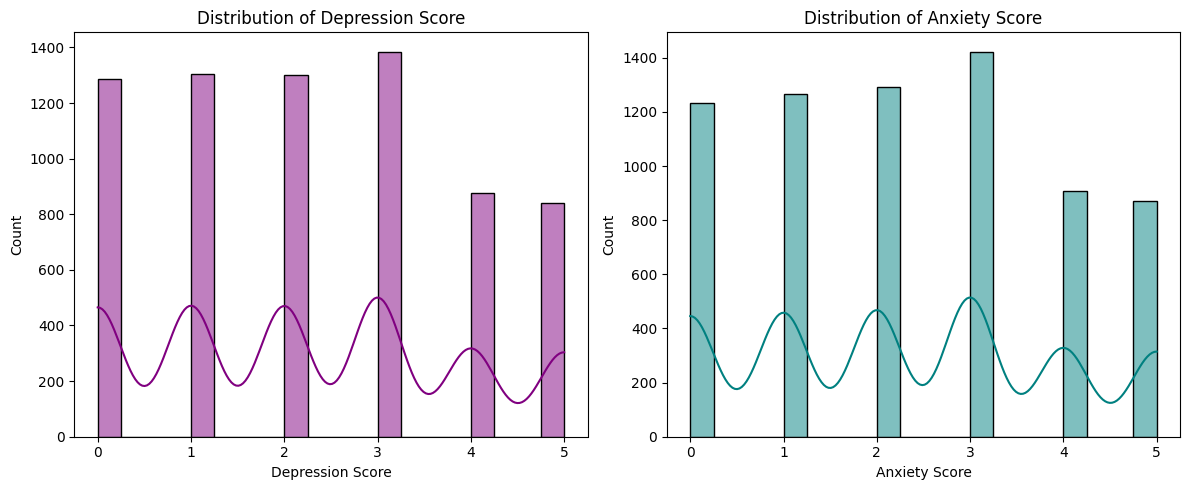

In [10]:
plt.figure(figsize=(12, 5))

# Histogram Depression Score
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Depression_Score', bins=20, color='purple', kde=True)
plt.title('Distribution of Depression Score')
plt.xlabel('Depression Score')
plt.ylabel('Count')

# Histogram Anxiety Score
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Anxiety_Score', bins=20, color='teal', kde=True)
plt.title('Distribution of Anxiety Score')
plt.xlabel('Anxiety Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Lifestyle and Wellness Factors
This section investigates how lifestyle related factors such as sleep quality, physical activity, and diet quality may relate to students' stress levels.

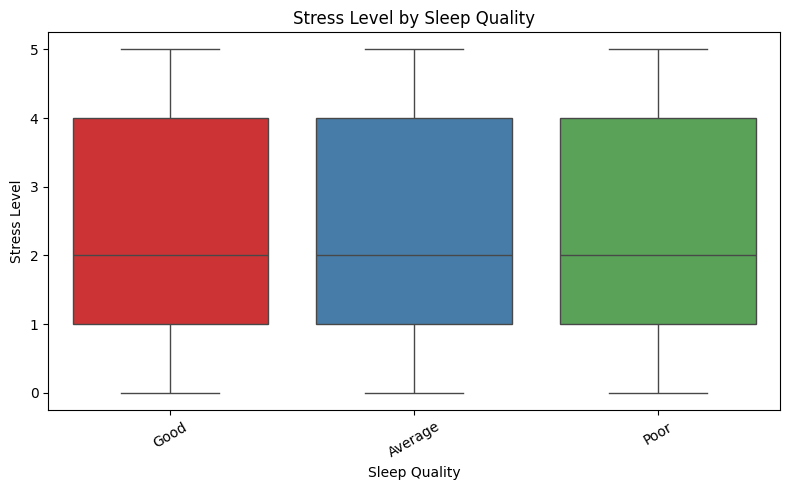

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x='Sleep_Quality',
    y='Stress_Level',
    hue='Sleep_Quality',
    palette='Set1',
    legend=False
)
plt.title('Stress Level by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

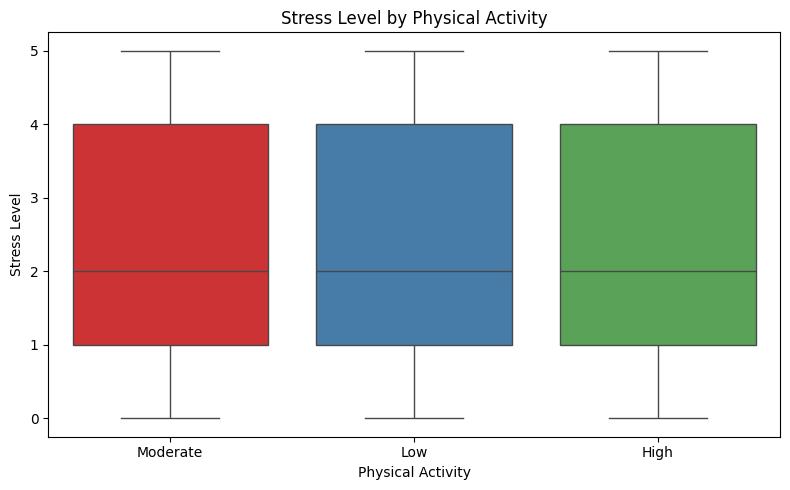

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Physical_Activity',
    y='Stress_Level',
    hue='Physical_Activity',
    data=data,
    palette='Set1' ,
    legend=False
)
plt.title('Stress Level by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

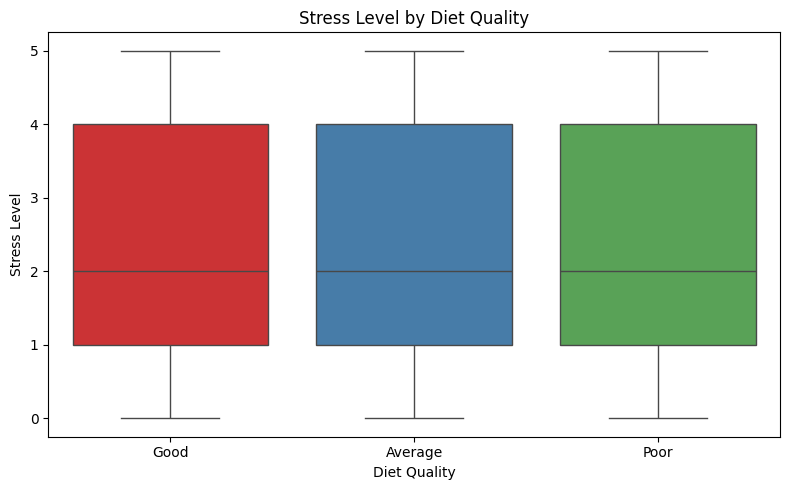

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Diet_Quality',
    y='Stress_Level',
    hue='Diet_Quality',
    data=data,
    palette='Set1',
    legend=False,
)

plt.title('Stress Level by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

### Support and Counseling Services
We explore how often students access counseling services and whether they have social or family support systems in place.


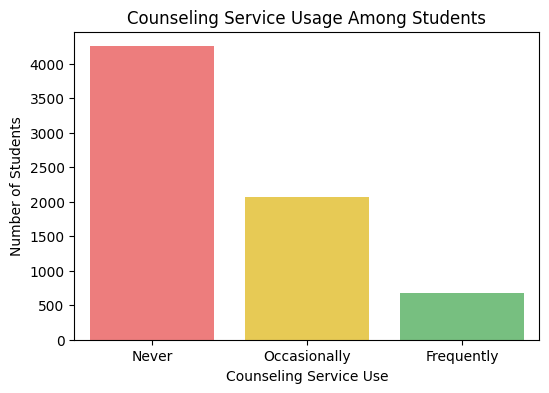

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x='Counseling_Service_Use',
    hue='Counseling_Service_Use',
    palette={'Never': '#FF6B6B', 'Occasionally': '#FFD93D', 'Frequently': '#6BCB77'},
    legend=False
)
plt.title('Counseling Service Usage Among Students')
plt.xlabel('Counseling Service Use')
plt.ylabel('Number of Students')
plt.show()

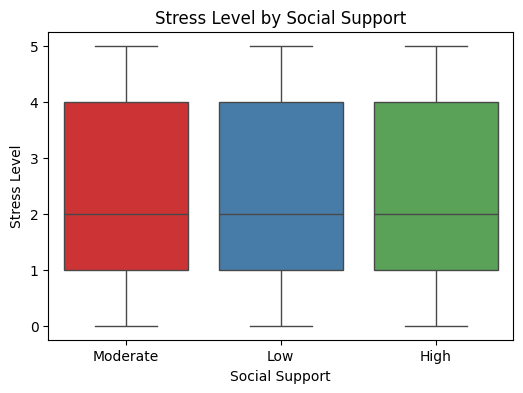

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Social_Support',
    y='Stress_Level',
    hue='Social_Support',
    data=data,
    palette='Set1',
    legend=False
)
plt.title('Stress Level by Social Support')
plt.xlabel('Social Support')
plt.ylabel('Stress Level')
plt.show()

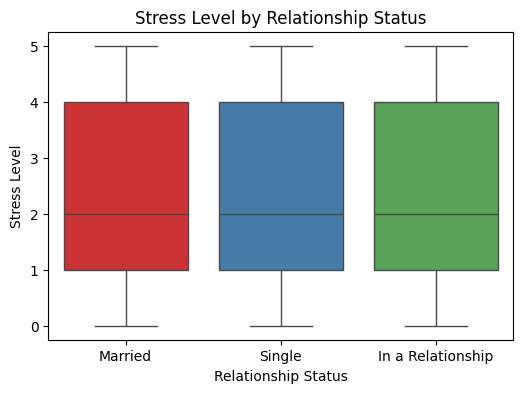

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Relationship_Status',
    y='Stress_Level',
    hue='Relationship_Status',
    data=data,
    palette='Set1',
    legend=False
)
plt.title('Stress Level by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Stress Level')
plt.show()

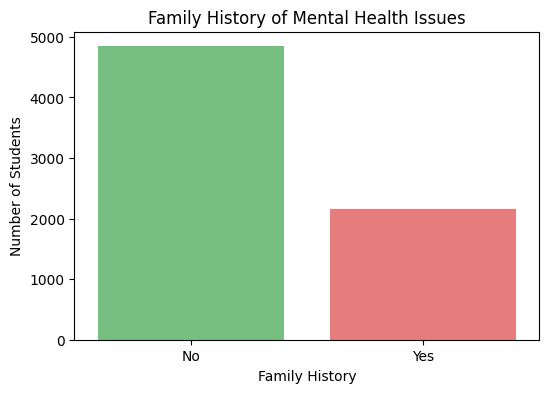

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x='Family_History',
    hue='Family_History',
    palette={'Yes': '#F76C6C', 'No': '#6BCB77'},
    legend=False
)
plt.title('Family History of Mental Health Issues')
plt.xlabel('Family History')
plt.ylabel('Number of Students')
plt.show()

### Academic and Financial Pressure
This section analyzes the academic performance (CGPA), credit load, and financial stress to evaluate their impact on student stress levels.

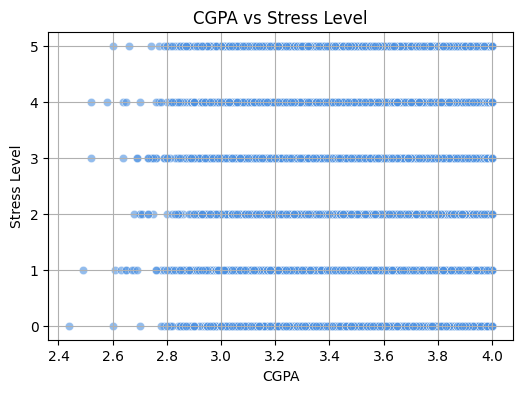

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=data,
    x='CGPA',
    y='Stress_Level',
    color='#4A90E2',
    alpha=0.6
)
plt.title('CGPA vs Stress Level')
plt.xlabel('CGPA')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

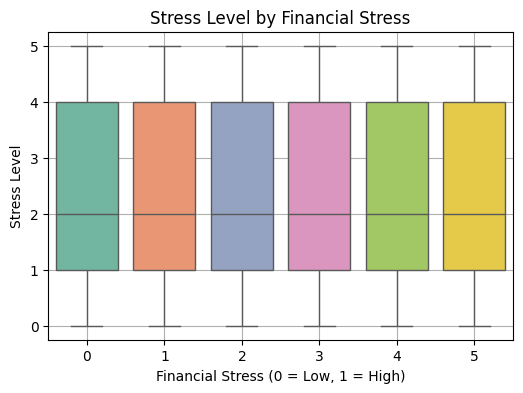

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='Financial_Stress',
    y='Stress_Level',
    hue=  'Financial_Stress',
    palette='Set2',
    legend=False,
)
plt.title('Stress Level by Financial Stress')
plt.xlabel('Financial Stress (0 = Low, 1 = High)')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

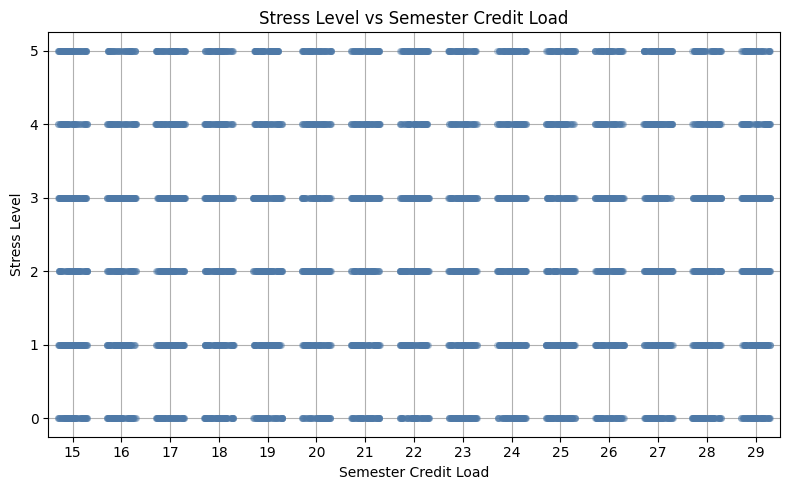

In [38]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=data,
    x='Semester_Credit_Load',
    y='Stress_Level',
    jitter=0.3,
    alpha=0.4,
    color='#4E79A7'
)
plt.title('Stress Level vs Semester Credit Load')
plt.xlabel('Semester Credit Load')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()
